In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB



In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


# 5. Xây dựng và đánh giá mô hình học sâu Neutual Network

In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.654690618762475, 1: 2.1161290322580646}

In [4]:
x_test.shape

(324, 33)

In [5]:
model = Sequential()

model.add(Dense(units=240,activation='relu'))
Dropout(0.5)
model.add(Dense(units=120,activation='relu'))
Dropout(0.5)
model.add(Dense(units=60,activation='relu'))
Dropout(0.5)
model.add(Dense(units=30,activation='relu'))
Dropout(0.5)
model.add(Dense(units=15,activation='relu'))
Dropout(0.5)


model.add(Dense(units=1,activation='sigmoid'))
Dropout(0.5)

# For a binary classification problem

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [6]:

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
checkpointer = ModelCheckpoint(filepath = "Emotion_weights.hdf5", verbose = 1, save_best_only=True)

model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),class_weight=class_weights_dict ,
          batch_size=128,epochs=600,callbacks=[checkpointer, earlystopping])



Epoch 1/600
1/6 [====>.........................] - ETA: 5s - loss: 0.8641 - accuracy: 0.7578
Epoch 1: val_loss improved from inf to 0.69867, saving model to Emotion_weights.hdf5
6/6 [==============================] - 4s 499ms/step - loss: 0.7259 - accuracy: 0.7073 - val_loss: 0.6987 - val_accuracy: 0.4753
Epoch 2/600
1/6 [====>.........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.4844
Epoch 2: val_loss improved from 0.69867 to 0.69739, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 22ms/step - loss: 0.6879 - accuracy: 0.4527 - val_loss: 0.6974 - val_accuracy: 0.4043
Epoch 3/600
1/6 [====>.........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.5234
Epoch 3: val_loss improved from 0.69739 to 0.69314, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 22ms/step - loss: 0.6771 - accuracy: 0.4802 - val_loss: 0.6931 - val_accuracy: 0.4475
Epoch 4/600
1/6 [====>.........................] - ETA: 0s - loss: 0.6201

<AxesSubplot: >

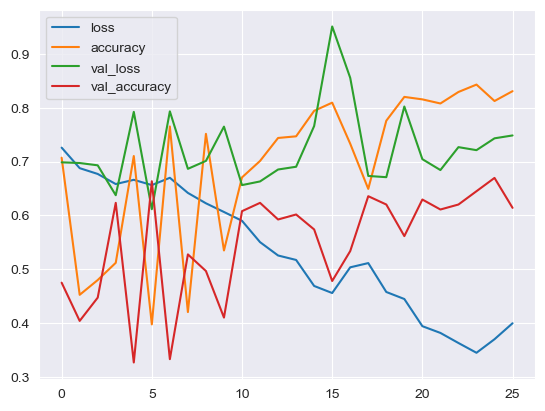

In [7]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [8]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=-1)
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.6142


[0.7485855221748352, 0.6141975522041321]

In [9]:
model.evaluate(x_test,y_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

11/11 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.6142
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       239
           1       0.00      0.00      0.00        85

    accuracy                           0.74       324
   macro avg       0.37      0.50      0.42       324
weighted avg       0.54      0.74      0.63       324

[[239   0]
 [ 85   0]]


### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

In [10]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [11]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    print(y_predict)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [12]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    #print(y_predict[0][0])
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    

1/1 [==============================] - 0s 103ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 32ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 17ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 31ms/step
True: N
Predicted: N
--------

1/1 [==============================] - 0s 22ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: Y
Predicted: N
---------

1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 20ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 19ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 20ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 22ms/step
True: Y
Predicted: N
---------

1/1 [==============================] - 0s 33ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 27ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 26ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 23ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
---------

1/1 [==============================] - 0s 25ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: Y
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------
1/1 [==============================] - 0s 24ms/step
True: N
Predicted: N
----------------------------


In [13]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 239 chiếm khoảng 73.76543209876543% tổng lần dự đoán
